In [1]:
import pandas as pd# It is used for data manipulation for data cleaning purposes,even it is helpful to treat missing values
import seaborn as sns# visualisation library based on matplotlib
from scipy.stats import skew 
from scipy.stats import kurtosis
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,classification_report
import numpy as np
# Load the tips dataset
tips_data = sns.load_dataset("tips")

# Display the first few rows of the dataset
tips_data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [2]:
tips_data.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [39]:
tips_data.shape

(244, 7)

In [22]:
tips_data.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

In [26]:
categorical_str=list(tips_data.select_dtypes(include=['category']).dtypes.index)
categorical_str
#to filter out data types having category from the columns of the data set to build a list of the categrical variables which are in string format.

['sex', 'smoker', 'day', 'time']

In [27]:
numeric=list(tips_data.select_dtypes(exclude=['category']).dtypes.index)
numeric
#to filter out data types having numeric from the columns of the data set to build a list of the numerical variables which are in numeric format.

['total_bill', 'tip', 'size']

In [52]:
#to find out categorical columns from the data set
categorical_col = [] #Initializes an empty list to store the names of columns that are identified as categorical.
for column in tips_data.columns: #Iterates through each column in the DataFrame.
    if tips_data[column].dtype=='category' and len(tips_data[column].unique()) <= 30:#Checks if the column's data type is 'category' (typically indicating a categorical variable) and if the number of unique values in that column is 30 or less.
        categorical_col.append(column) # If the conditions in the if statement are met, it appends the column name to the categorical_col list.
        print(f"{column} : {tips_data[column].unique()}") #Prints the name of the column and its unique values.
        print(f"{column} : {tips_data[column].value_counts()}")
        print("====================================") # Prints a separator line for clarity.
        
#The purpose of this code is to help you identify and inspect categorical columns in your DataFrame, particularly those with a manageable number of unique categories. This information is useful for data exploration and analysis, especially when you need to decide how to handle categorical variables in machine learning or data analysis tasks.

sex : ['Female', 'Male']
Categories (2, object): ['Male', 'Female']
sex : sex
Male      157
Female     87
Name: count, dtype: int64
smoker : ['No', 'Yes']
Categories (2, object): ['Yes', 'No']
smoker : smoker
No     151
Yes     93
Name: count, dtype: int64
day : ['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']
day : day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64
time : ['Dinner', 'Lunch']
Categories (2, object): ['Lunch', 'Dinner']
time : time
Dinner    176
Lunch      68
Name: count, dtype: int64


In [54]:
#to find out categorical columns from the data set
categorical_col = [] #Initializes an empty list to store the names of columns that are identified as categorical.
for column in tips_data.columns: #Iterates through each column in the DataFrame.
    if len(tips_data[column].unique()) <= 30:#Checks if the column's data type is 'category' (typically indicating a categorical variable) and if the number of unique values in that column is 30 or less.
        categorical_col.append(column) # If the conditions in the if statement are met, it appends the column name to the categorical_col list.
        print(f"{column} : {tips_data[column].unique()}") #Prints the name of the column and its unique values.
        print(f"{column} : {tips_data[column].value_counts()}")
        print("====================================") # Prints a separator line for clarity.
        
#The purpose of this code is to help you identify and inspect categorical columns in your DataFrame, particularly those with a manageable number of unique categories. This information is useful for data exploration and analysis, especially when you need to decide how to handle categorical variables in machine learning or data analysis tasks.

sex : ['Female', 'Male']
Categories (2, object): ['Male', 'Female']
sex : sex
Male      157
Female     87
Name: count, dtype: int64
smoker : ['No', 'Yes']
Categories (2, object): ['Yes', 'No']
smoker : smoker
No     151
Yes     93
Name: count, dtype: int64
day : ['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']
day : day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64
time : ['Dinner', 'Lunch']
Categories (2, object): ['Lunch', 'Dinner']
time : time
Dinner    176
Lunch      68
Name: count, dtype: int64
size : [2 3 4 1 6 5]
size : size
2    156
3     38
4     37
5      5
1      4
6      4
Name: count, dtype: int64


In [37]:
categorical_col

['sex', 'smoker', 'day', 'time']

In [11]:
tips_data.total_bill.value_counts()

total_bill
13.42    3
13.81    2
15.98    2
17.92    2
10.07    2
        ..
24.71    1
21.16    1
28.97    1
22.49    1
18.78    1
Name: count, Length: 229, dtype: int64

In [12]:
tips_data.tip.value_counts()

tip
2.00    33
3.00    23
4.00    12
5.00    10
2.50    10
        ..
4.34     1
1.56     1
5.20     1
2.60     1
1.75     1
Name: count, Length: 123, dtype: int64

In [13]:
tips_data.sex.value_counts()

sex
Male      157
Female     87
Name: count, dtype: int64

In [14]:
tips_data.smoker.value_counts()

smoker
No     151
Yes     93
Name: count, dtype: int64

In [15]:
tips_data.day.value_counts()

day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64

In [16]:
tips_data.time.value_counts()

time
Dinner    176
Lunch      68
Name: count, dtype: int64

In [10]:
tips_data['size'].value_counts()

size
2    156
3     38
4     37
5      5
1      4
6      4
Name: count, dtype: int64

/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='time', ylabel='tip'>

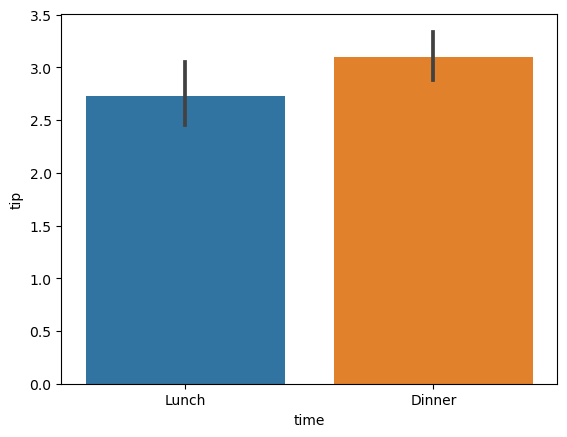

In [4]:
sns.barplot(x="time",y="tip",data=tips_data)

/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='size', ylabel='tip'>

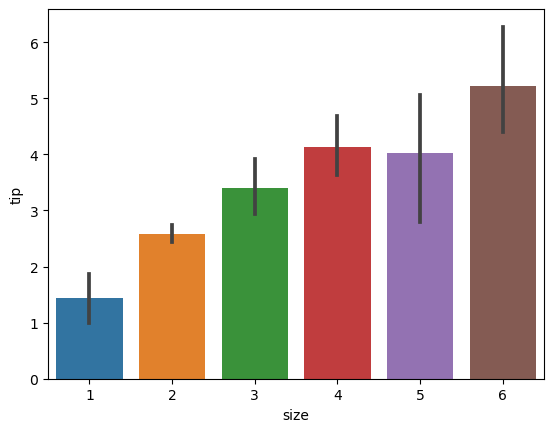

In [28]:
sns.barplot(x="size",y="tip",data=tips_data)

/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='day', ylabel='tip'>

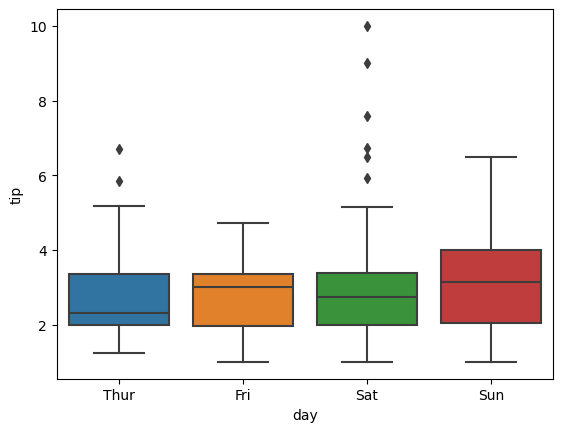

In [5]:
sns.boxplot(x="day",y="tip",data=tips_data)

/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='total_bill', ylabel='tip'>

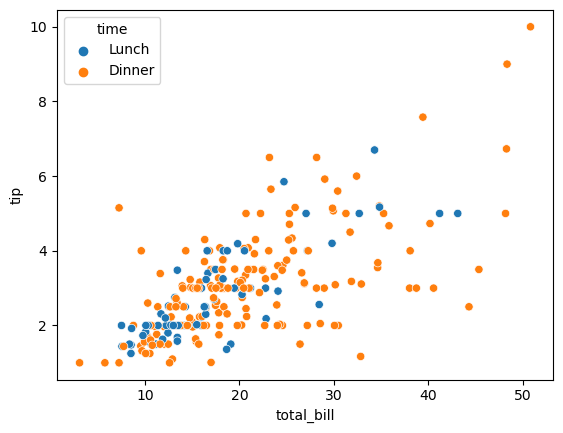

In [17]:
sns.scatterplot(x="total_bill",y="tip",data=tips_data,hue="time")

/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='smoker', ylabel='count'>

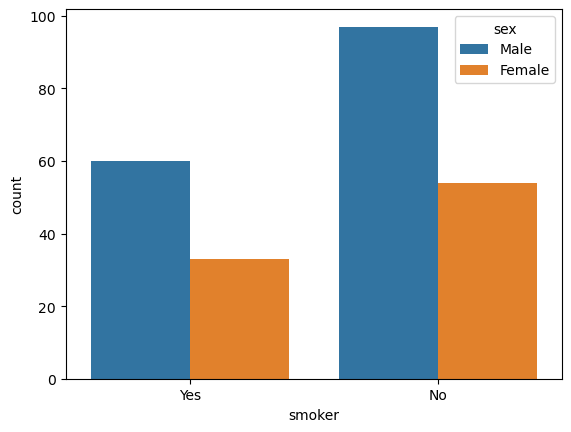

In [21]:
sns.countplot(x="smoker", hue="sex", data=tips_data)